In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd

from pathlib import Path

metrics = Path("metrics/relax")

data = []
for file in sorted(metrics.glob("*.json")):
    print(file)
    df = pd.read_json(file)
    data.append(df)

data = data[1:]
len(data)

metrics/relax/2023-05-12_2023-05-13.json
metrics/relax/2023-05-13_2023-05-14.json
metrics/relax/2023-05-14_2023-05-15.json
metrics/relax/2023-05-15_2023-05-16.json
metrics/relax/2023-05-16_2023-05-17.json
metrics/relax/2023-05-17_2023-05-18.json
metrics/relax/2023-05-18_2023-05-19.json
metrics/relax/2023-05-19_2023-05-20.json
metrics/relax/2023-05-20_2023-05-21.json
metrics/relax/2023-05-21_2023-05-22.json
metrics/relax/2023-05-22_2023-05-23.json
metrics/relax/2023-05-23_2023-05-24.json
metrics/relax/2023-05-24_2023-05-25.json


12

In [246]:
# combine series
t_df = pd.DataFrame([], columns=data[0].columns)

for d in data:
    t_df = pd.concat([t_df, d], axis=0)

t_df = t_df.reset_index().drop('index', axis=1)
t_df

,kdpt_diffusion_anime,v4_anime_upscaler,v4_diffusion,v4_upscaler,v5_diffusion,v5_diffusion_anime
0,0.0975,0.0857,3.2797,3.9826,1.8108,5.9252
1,0.0540,0.0432,3.2420,4.3456,1.9148,6.0167
2,0.0218,0.0852,3.8725,4.4209,2.2445,5.6536
3,0.0083,0.0422,2.4842,4.0656,2.5944,5.1109
4,0.0194,0.0158,1.2666,5.0939,2.6482,5.4549
...,...,...,...,...,...,...
667,0.0361,0.1329,0.8286,3.8197,0.9286,5.3450
668,0.0365,0.1039,1.1770,7.3716,1.0746,5.2677
669,0.0340,0.0254,1.0332,12.5686,1.1277,4.9171
670,0.0327,0.0319,0.3143,19.0922,1.1145,4.9626


/var/folders/1c/66th25rx3059qwtmh9gh_hsc0000gn/T/ipykernel_15419/993676002.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



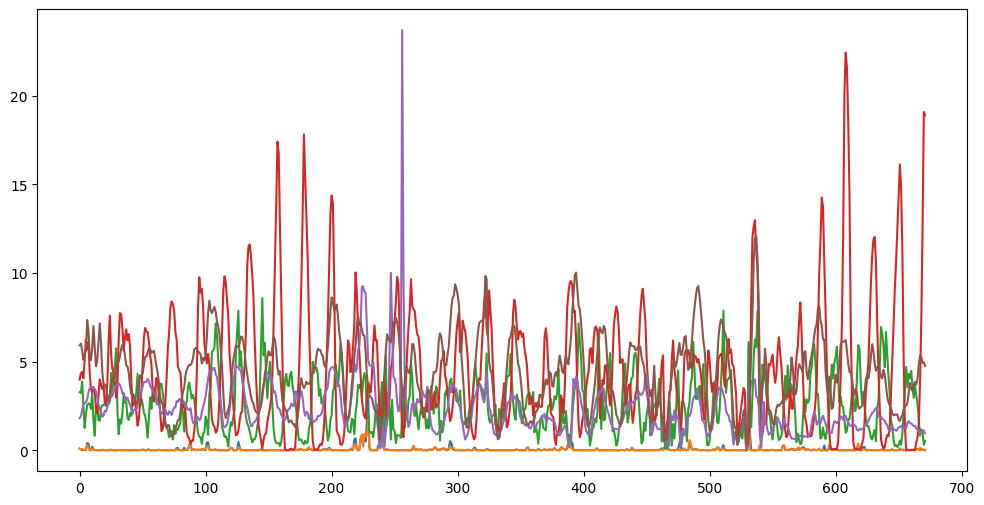

In [247]:
index = 0

fig, ax = plt.subplots(figsize=(12, 6))

for col in t_df:
    ax.plot(t_df[col], label=col)

fig.show()

In [248]:
# selected column
col = data[0].columns[-1]

limit = len(data) + 1
columns = [f"Day {i}"  for i in range(1, limit)]
series_df = pd.DataFrame([], columns=columns)
for column, d in zip(columns, data):
    series_df[column] = d[col]

series_df

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7
0,5.9252,5.3905,5.4356,5.8564,4.3576,6.3835,5.5898
1,6.0167,4.8994,5.3076,4.9809,4.9043,6.4474,4.3843
2,5.6536,5.2083,4.8520,4.7975,5.3988,5.3829,4.0113
3,5.1109,5.0640,4.7028,4.7967,4.9275,4.5341,4.5195
4,5.4549,5.3474,5.0557,5.4060,4.8582,4.7939,5.0496
...,...,...,...,...,...,...,...
91,5.6853,4.7055,4.4648,4.1752,5.5207,4.8646,5.3450
92,5.7646,5.3652,4.9556,4.7366,6.0528,4.7325,5.2677
93,5.7872,5.7291,6.1695,5.3411,5.3878,4.5787,4.9171
94,5.5071,5.6621,6.6001,4.9675,5.3909,4.3749,4.9626


In [249]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=series_df)])
color = "#202125"

fig.update_layout(
    title='Time series over time', 
    autosize=False,
    width=1000, 
    height=600,
    margin=dict(l=20, r=20, b=20, t=60),
    scene=dict(
        xaxis_title='Day of Week',
        yaxis_title='Time of Day',
        zaxis_title='Average Wait Time',
        bgcolor=color,
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='white'),
    ),
    font=dict(
        color="white",
        size=12
    ),
    plot_bgcolor=color,
    paper_bgcolor=color,
)
fig.show()

In [250]:
col = t_df.columns[-1]
t_df[col]

0      5.9252
1      6.0167
2      5.6536
3      5.1109
4      5.4549
        ...  
667    5.3450
668    5.2677
669    4.9171
670    4.9626
671    4.7626
Name: v5_diffusion_anime, Length: 672, dtype: float64

## Features for ML

In [251]:
import numpy as np

X = t_df.values
columns = t_df.columns
N_MODELS = len(columns)
SAMPLES_PER_DAY = 96
HOURS_PER_DAY = 24
DAYS_PER_WEEK = 7
SAMPLES_PER_MODEL = SAMPLES_PER_DAY * DAYS_PER_WEEK
print(t_df.shape, columns, SAMPLES_PER_DAY, SAMPLES_PER_MODEL)
X.shape

(672, 6) Index(['kdpt_diffusion_anime', 'v4_anime_upscaler', 'v4_diffusion',
       'v4_upscaler', 'v5_diffusion', 'v5_diffusion_anime'],
      dtype='object') 96 672


(672, 6)

In [252]:
# create new df
df = pd.DataFrame([columns[i // SAMPLES_PER_MODEL] for i in range(X.reshape(-1, 1).shape[0])], columns=['model'])
df['delay_m'] = X.reshape(-1, 1)
df

,model,delay_m
0,kdpt_diffusion_anime,0.0975
1,kdpt_diffusion_anime,0.0857
2,kdpt_diffusion_anime,3.2797
3,kdpt_diffusion_anime,3.9826
4,kdpt_diffusion_anime,1.8108
...,...,...
4027,v5_diffusion_anime,0.0109
4028,v5_diffusion_anime,0.5258
4029,v5_diffusion_anime,18.9002
4030,v5_diffusion_anime,0.9636


In [253]:
# select a model
model = df['model'].unique()[-1]
print(model)
df = df[df['model'] == model].drop('model', axis=1)
df

v5_diffusion_anime


,delay_m
3360,0.0220
3361,0.0129
3362,4.1970
3363,1.1243
3364,1.5071
...,...
4027,0.0109
4028,0.5258
4029,18.9002
4030,0.9636


In [254]:
# time_minutes = np.tile( np.arange(0, 96 * 7) * 15, N_MODELS)
time_minutes = np.arange(0, 96 * 7) * 15
time_minutes[0:10]

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [255]:
time_seconds = time_minutes * 60
time_seconds[0:10]

array([   0,  900, 1800, 2700, 3600, 4500, 5400, 6300, 7200, 8100])

## Find Most Important Frequency

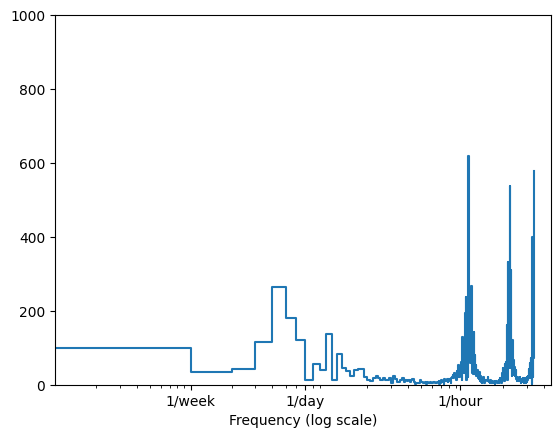

In [256]:
fft = tf.signal.rfft(df['delay_m'])
f_per_dataset = np.arange(0, len(fft))

n_samples_15min = len(df['delay_m'])
n_15min_per_week = 96*7
weeks_per_dataset = n_samples_15min/n_15min_per_week

f_per_week = f_per_dataset/weeks_per_dataset
plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 7, 96], labels=['1/week', '1/day', '1/hour'])
_ = plt.xlabel('Frequency (log scale)')

In [257]:
# use day as N hours cycle
custom1 = 1 * 60 * 60
custom2 = 3 * 60 * 60
# day = 24*60*60
day = 6*60*60
week = 7*24*60*60
# original (modded)
df['Day sin'] = np.sin(time_seconds * (2 * np.pi / day))
df['Day cos'] = np.cos(time_seconds * (2 * np.pi / day))
df['Week sin'] = np.sin(time_seconds * (2 * np.pi / week))
df['Week cos'] = np.cos(time_seconds * (2 * np.pi / week))
# custom
df['C1 sin'] = np.sin(time_seconds * (2 * np.pi / custom1))
df['C1 cos'] = np.cos(time_seconds * (2 * np.pi / custom1))
df['C2 sin'] = np.sin(time_seconds * (2 * np.pi / custom2))
df['C2 cos'] = np.cos(time_seconds * (2 * np.pi / custom2))
# df['C3 sin'] = np.sin(time_seconds * (2 * np.pi / custom3))
# df['C3 cos'] = np.cos(time_seconds * (2 * np.pi / custom3))
df

,delay_m,Day sin,Day cos,Week sin,Week cos,C1 sin,C1 cos,C2 sin,C2 cos
3360,0.0220,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+00,0.000000,1.000000e+00
3361,0.0129,0.258819,0.965926,0.009350,0.999956,1.000000e+00,6.123234e-17,0.500000,8.660254e-01
3362,4.1970,0.500000,0.866025,0.018699,0.999825,1.224647e-16,-1.000000e+00,0.866025,5.000000e-01
3363,1.1243,0.707107,0.707107,0.028046,0.999607,-1.000000e+00,-1.836970e-16,1.000000,6.123234e-17
3364,1.5071,0.866025,0.500000,0.037391,0.999301,-2.449294e-16,1.000000e+00,0.866025,-5.000000e-01
...,...,...,...,...,...,...,...,...,...
4027,0.0109,-0.965926,0.258819,-0.046733,0.998907,-1.000000e+00,9.949022e-14,-0.500000,-8.660254e-01
4028,0.5258,-0.866025,0.500000,-0.037391,0.999301,3.725650e-14,1.000000e+00,-0.866025,-5.000000e-01
4029,18.9002,-0.707107,0.707107,-0.028046,0.999607,1.000000e+00,2.497722e-14,-1.000000,-8.325741e-15
4030,0.9636,-0.500000,0.866025,-0.018699,0.999825,8.721095e-14,-1.000000e+00,-0.866025,5.000000e-01


Text(0.5, 1.0, 'Time of "day" signal')

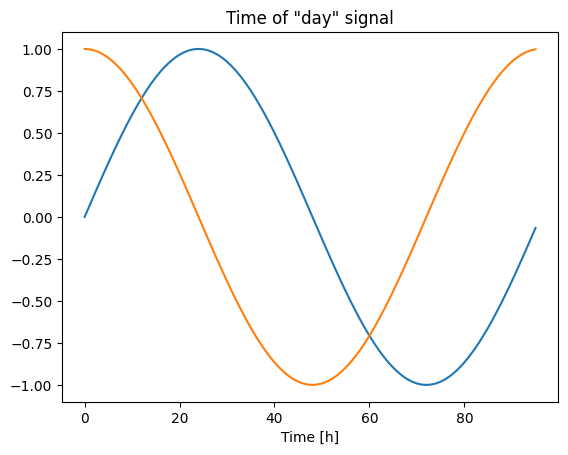

In [258]:
plt.plot(np.array(np.sin(time_seconds * (2 * np.pi / (24*60*60))))[:96])
plt.plot(np.array(np.cos(time_seconds * (2 * np.pi / (24*60*60))))[:96])
plt.xlabel('Time [h]')
plt.title('Time of "day" signal')

## Split data

In [259]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [260]:
# normalize
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
train_df

,delay_m,Day sin,Day cos,Week sin,Week cos,C1 sin,C1 cos,C2 sin,C2 cos
3360,-0.728899,-0.022102,1.412816,-0.488589,1.735967,-0.003006,1.409709,-0.001505,1.404882
3361,-0.731828,0.344351,1.364774,-0.473347,1.735905,1.409709,-0.003006,0.705980,1.215913
3362,0.614933,0.685831,1.223923,-0.458105,1.735717,-0.003006,-1.415720,1.223894,0.699641
3363,-0.374095,0.979067,0.999860,-0.442866,1.735405,-1.415720,-0.003006,1.413464,-0.005600
3364,-0.250881,1.204075,0.707857,-0.427631,1.734968,-0.003006,1.409709,1.223894,-0.710841
...,...,...,...,...,...,...,...,...,...
3825,-0.647754,0.979067,-0.994065,-2.011690,-0.202732,1.409709,-0.003006,-1.416475,-0.005600
3826,-0.162236,0.685831,-1.218127,-2.017059,-0.190227,-0.003006,-1.415720,-1.226905,0.699641
3827,0.571158,0.344351,-1.358979,-2.022295,-0.177678,-1.415720,-0.003006,-0.708990,1.215913
3828,-0.735015,-0.022102,-1.407021,-2.027396,-0.165087,-0.003006,1.409709,-0.001505,1.404882


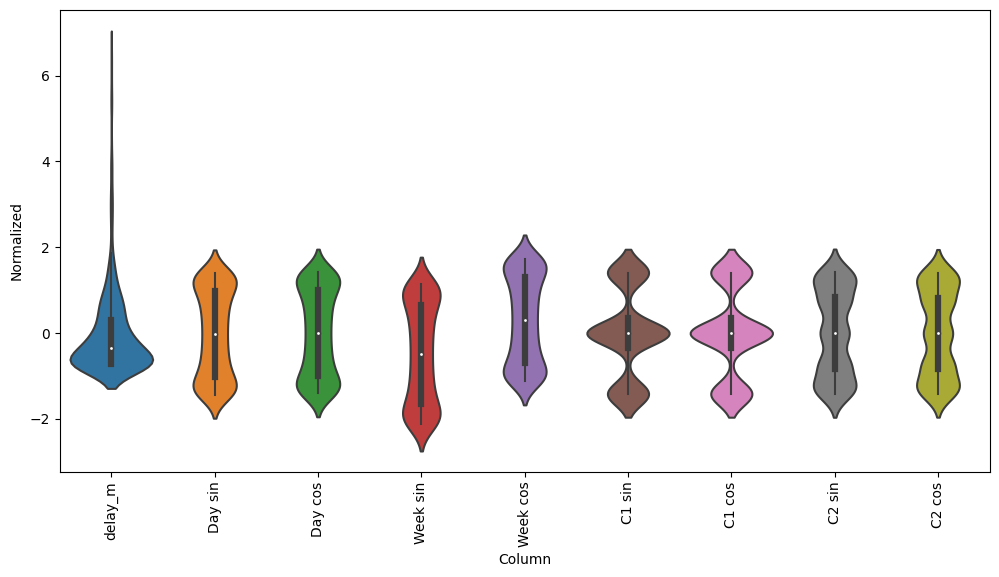

In [261]:
# plot dist
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data Windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 

In [262]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [263]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Day sin'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Day sin']

In [264]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Day sin'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Day sin']

## Split Window

In [265]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [266]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 9)
Inputs shape: (3, 6, 9)
Labels shape: (3, 1, 1)


In [267]:
w2.example = example_inputs, example_labels

This plot aligns inputs, labels, and (later) predictions based on the time that the item refers to:

In [268]:
def plot(self, model=None, plot_col='delay_m', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

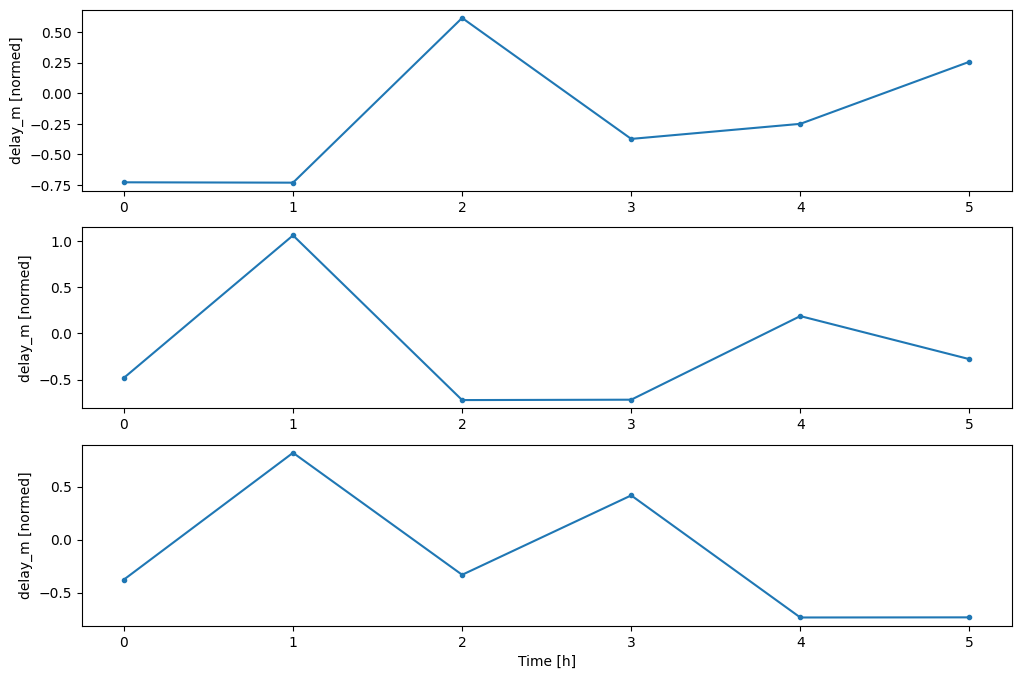

In [269]:
w2.plot(plot_col='delay_m')

## Part 4

Finally, this `make_dataset` method will take a time series DataFrame and convert it to a `tf.data.Dataset` of `(input_window, label_window)` pairs using the `tf.keras.utils.timeseries_dataset_from_array` function

In [270]:
# method will take a time series DataFrame and convert it to a `tf.data.Dataset` of `(input_window, label_window)` pairs using the `tf.keras.utils.timeseries_dataset_from_array` function:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The `WindowGenerator` object holds training, validation, and test data.

Add properties for accessing them as `tf.data.Dataset`s using the `make_dataset` method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [271]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [272]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [273]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 9)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models

The simplest model you can build on this sort of data is one that predicts a single feature's value—1 time step (one hour) into the future based only on the current conditions.

Configure a `WindowGenerator` object to produce these single-step `(input, label)` pairs:

In [274]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['delay_m'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['delay_m']

In [275]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 9)
Labels shape (batch, time, features): (32, 1, 1)


### Baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

In [276]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [277]:
baseline = Baseline(label_index=column_indices['delay_m'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 2.2182 - mean_absolute_error: 0.9649


Create a wider `WindowGenerator` that generates windows 24 hours of consecutive inputs and labels at a time. The new `wide_window` variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the `time` axis acts like the `batch` axis: each prediction is made independently with no interaction between time steps:

In [278]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['delay_m'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['delay_m']

This expanded window can be passed directly to the same `baseline` model without any code changes. This is possible because the inputs and labels have the same number of time steps, and the baseline just forwards the input to the output:

In [279]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


By plotting the baseline model's predictions, notice that it is simply the labels shifted right by one hour:

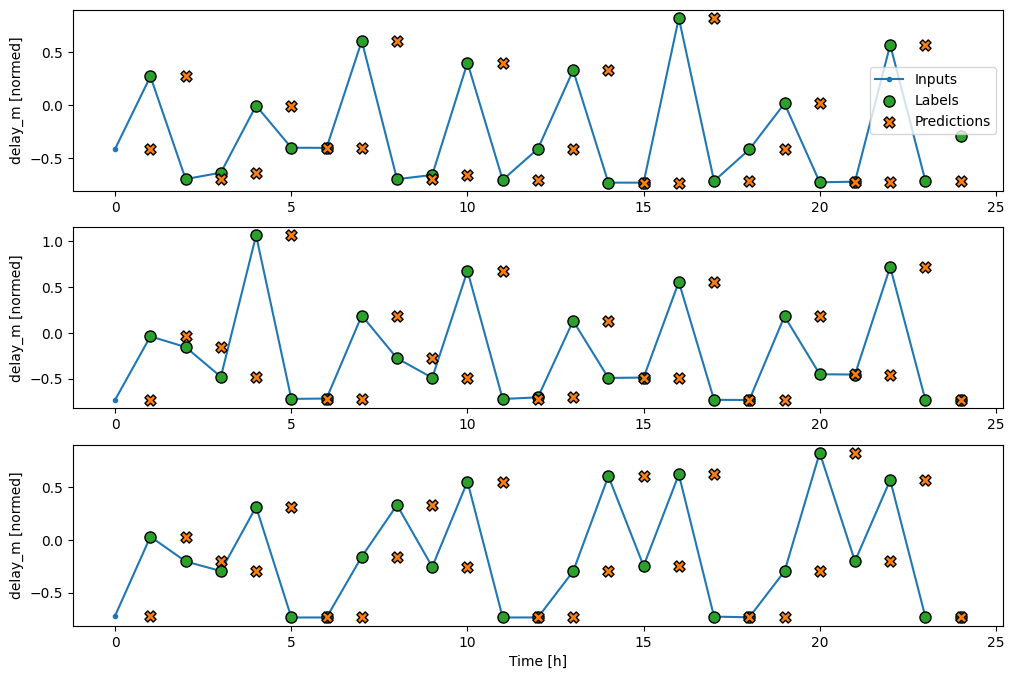

In [280]:
wide_window.plot(baseline)

## Linear model

The simplest **trainable** model you can apply to this task is to insert linear transformation between the input and output. In this case the output from a time step only depends on that step:

In [281]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [282]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 9)
Output shape: (32, 1, 1)


In [283]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [284]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
15/15 [==============================] - 1s 14ms/step - loss: 1.9937 - mean_absolute_error: 1.0878 - val_loss: 1.6163 - val_mean_absolute_error: 0.9112
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.9197 - mean_absolute_error: 1.0639 - val_loss: 1.5646 - val_mean_absolute_error: 0.8898
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.8512 - mean_absolute_error: 1.0410 - val_loss: 1.5156 - val_mean_absolute_error: 0.8690
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.7862 - mean_absolute_error: 1.0193 - val_loss: 1.4704 - val_mean_absolute_error: 0.8498
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.7262 - mean_absolute_error: 0.9988 - val_loss: 1.4263 - val_mean_absolute_error: 0.8303
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.6681 - mean_absolute_error: 0.9783 - val_loss: 1.3868 - val_mean_absolute_error: 0.8124
Epoch 7/20
15/15 [=========

In [285]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


Here is the plot of its example predictions on the `wide_window`, note how in many cases the prediction is clearly better than just returning the input, but in a few cases it's worse:

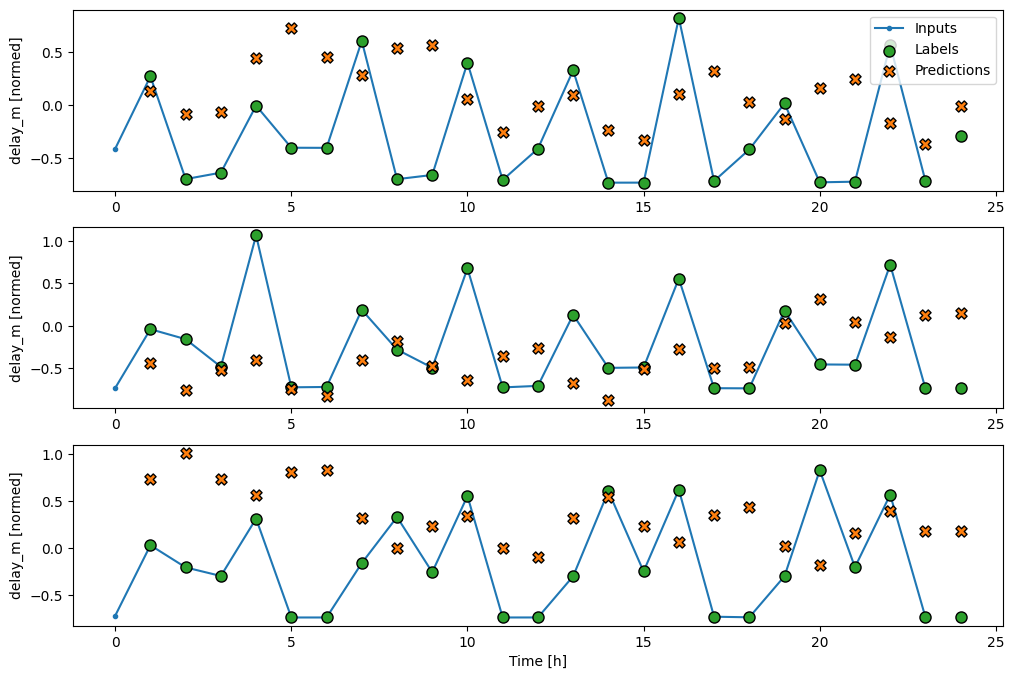

In [286]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to  interpret. You can pull out the layer's weights and visualize the weight assigned to each input:

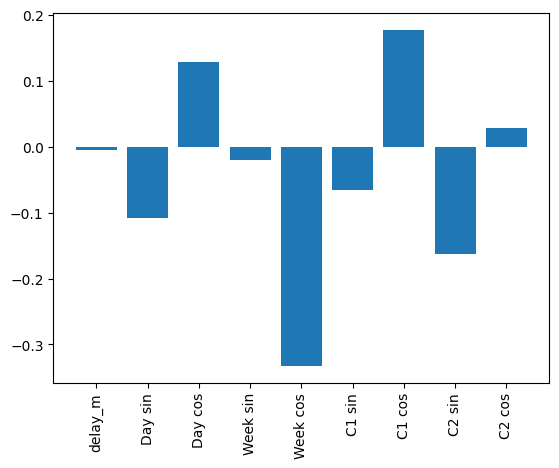

In [287]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Dense

Before applying models that actually operate on multiple time-steps, it's worth checking the performance of deeper, more powerful, single input step models.

Here's a model similar to the `linear` model, except it stacks several a few `Dense` layers between the input and the output: 

In [288]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
15/15 [==============================] - 2s 35ms/step - loss: 1.0235 - mean_absolute_error: 0.7004 - val_loss: 0.9160 - val_mean_absolute_error: 0.6361
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.8814 - mean_absolute_error: 0.6449 - val_loss: 0.8690 - val_mean_absolute_error: 0.6413
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.8031 - mean_absolute_error: 0.5937 - val_loss: 0.8173 - val_mean_absolute_error: 0.6141
Epoch 4/20
15/15 [==============================] - 0s 6ms/step - loss: 0.7444 - mean_absolute_error: 0.5803 - val_loss: 0.7689 - val_mean_absolute_error: 0.5899
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6824 - mean_absolute_error: 0.5099 - val_loss: 0.7226 - val_mean_absolute_error: 0.5601
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 0.6280 - mean_absolute_error: 0.4933 - val_loss: 0.6858 - val_mean_absolute_error: 0.5508
Epoch 7/20
15/15 [=========

## Multi-step dense

A single-time-step model has no context for the current values of its inputs. It can't see how the input features are changing over time. To address this issue the model needs access to multiple time steps when making predictions:

![Three time steps are used for each prediction.](images/conv_window.png)


In [289]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['delay_m'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['delay_m']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

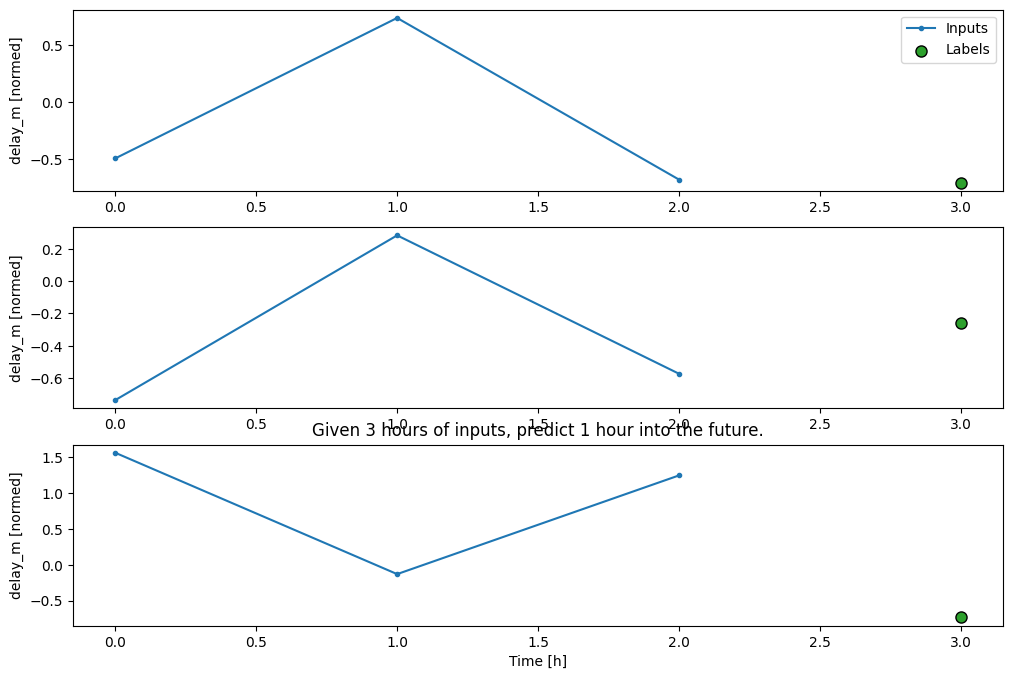

In [290]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

You could train a `dense` model on a multiple-input-step window by adding a `tf.keras.layers.Flatten` as the first layer of the model:

In [291]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [292]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [293]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/20
15/15 [==============================] - 1s 16ms/step - loss: 1.0600 - mean_absolute_error: 0.7202 - val_loss: 0.9190 - val_mean_absolute_error: 0.6047
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 0.8859 - mean_absolute_error: 0.6546 - val_loss: 0.8412 - val_mean_absolute_error: 0.5736
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.7940 - mean_absolute_error: 0.6038 - val_loss: 0.7868 - val_mean_absolute_error: 0.5587
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.7221 - mean_absolute_error: 0.5620 - val_loss: 0.7488 - val_mean_absolute_error: 0.5394
Epoch 5/20
15/15 [==============================] - 0s 7ms/step - loss: 0.6606 - mean_absolute_error: 0.5130 - val_loss: 0.7235 - val_mean_absolute_error: 0.5148
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6148 - mean_absolute_error: 0.4761 - val_loss: 0.7066 - val_mean_absolute_error: 0.5079
Epoch 7/20
15/15 [=========

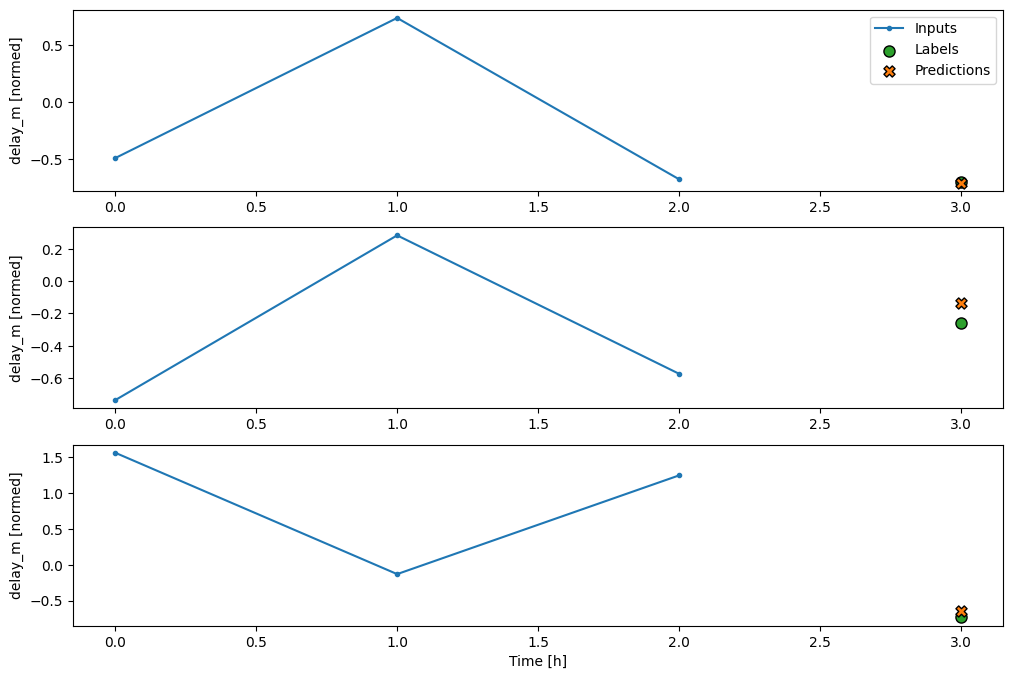

In [294]:
conv_window.plot(multi_step_dense)

In [295]:
# The main down-side of this approach is that the resulting model can only be executed on input windows of exactly this shape. 
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 9)

ValueError:Exception encountered when calling layer 'sequential_31' (type Sequential).

Input 0 of layer "dense_54" is incompatible with the layer: expected axis -1 of input shape to have value 27, but received input with shape (32, 216)

Call arguments received by layer 'sequential_31' (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 9), dtype=float32)
  • training=None
  • mask=None


### Convolution neural network
 
A convolution layer (`tf.keras.layers.Conv1D`) also takes multiple time steps as input to each prediction.

Below is the **same** model as `multi_step_dense`, re-written with a convolution. 

Note the changes:
* The `tf.keras.layers.Flatten` and the first `tf.keras.layers.Dense` are replaced by a `tf.keras.layers.Conv1D`.
* The `tf.keras.layers.Reshape` is no longer necessary since the convolution keeps the time axis in its output.

In [296]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [297]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 9)
Output shape: (32, 1, 1)


In [298]:
# Train and evaluate it on the ` conv_window` and it should give performance similar to the `multi_step_dense` model.
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
15/15 [==============================] - 2s 48ms/step - loss: 1.1613 - mean_absolute_error: 0.7625 - val_loss: 1.1901 - val_mean_absolute_error: 0.8196
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.9221 - mean_absolute_error: 0.6333 - val_loss: 1.0010 - val_mean_absolute_error: 0.6953
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.8081 - mean_absolute_error: 0.5860 - val_loss: 0.9191 - val_mean_absolute_error: 0.6743
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 0.7335 - mean_absolute_error: 0.5422 - val_loss: 0.8351 - val_mean_absolute_error: 0.6327
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6695 - mean_absolute_error: 0.5035 - val_loss: 0.7783 - val_mean_absolute_error: 0.5994
Epoch 6/20
15/15 [==============================] - 0s 7ms/step - loss: 0.6207 - mean_absolute_error: 0.4689 - val_loss: 0.7389 - val_mean_absolute_error: 0.5667
Epoch 7/20
15/15 [=========

The difference between this `conv_model` and the `multi_step_dense` model is that the `conv_model` can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

![Executing a convolutional model on a sequence](images/wide_conv_window.png)

If you run it on wider input, it produces wider output:

In [299]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 9)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


Note that the output is shorter than the input. To make training or plotting work, you need the labels, and prediction to have the same length. So build a `WindowGenerator` to produce wide windows with a few extra input time steps so the label and prediction lengths match:

In [300]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['delay_m'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['delay_m']

In [301]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 9)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


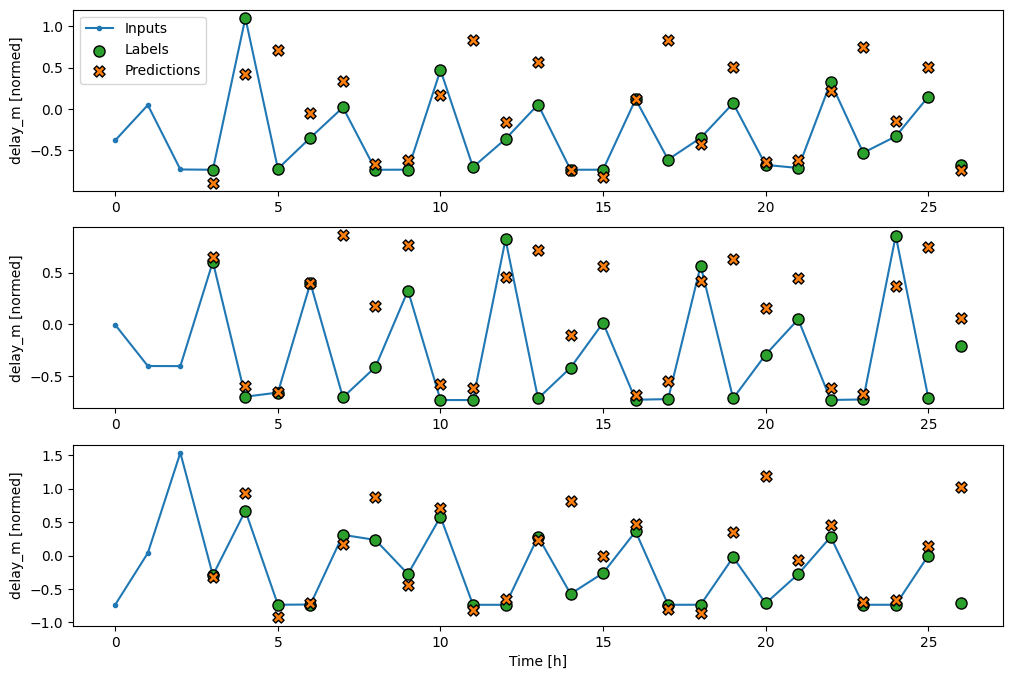

In [302]:
wide_conv_window.plot(conv_model)

## Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

You can learn more in the [Text generation with an RNN](https://www.tensorflow.org/text/tutorials/text_generation) tutorial and the [Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn) guide.

An important constructor argument for all Keras RNN layers, such as `tf.keras.layers.LSTM`, is the `return_sequences` argument. This setting can configure the layer in one of two ways:

In [303]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

With `return_sequences=True`, the model can be trained on 24 hours of data at a time.

Note: This will give a pessimistic view of the model's performance. On the first time step, the model has no access to previous steps and, therefore, can't do any better than the simple `linear` and `dense` models shown earlier.

In [304]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 9)
Output shape: (32, 24, 1)


In [305]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
14/14 [==============================] - 5s 69ms/step - loss: 1.0143 - mean_absolute_error: 0.7094 - val_loss: 1.0561 - val_mean_absolute_error: 0.6284
Epoch 2/20
14/14 [==============================] - 0s 14ms/step - loss: 0.9666 - mean_absolute_error: 0.6953 - val_loss: 1.0198 - val_mean_absolute_error: 0.6145
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.9178 - mean_absolute_error: 0.6704 - val_loss: 0.9734 - val_mean_absolute_error: 0.6217
Epoch 4/20
14/14 [==============================] - 0s 13ms/step - loss: 0.8613 - mean_absolute_error: 0.6508 - val_loss: 0.9244 - val_mean_absolute_error: 0.6186
Epoch 5/20
14/14 [==============================] - 0s 14ms/step - loss: 0.7937 - mean_absolute_error: 0.6147 - val_loss: 0.8739 - val_mean_absolute_error: 0.6071
Epoch 6/20
14/14 [==============================] - 0s 13ms/step - loss: 0.7273 - mean_absolute_error: 0.5826 - val_loss: 0.8269 - val_mean_absolute_error: 0.5988
Epoch 7/20
14/14 [====

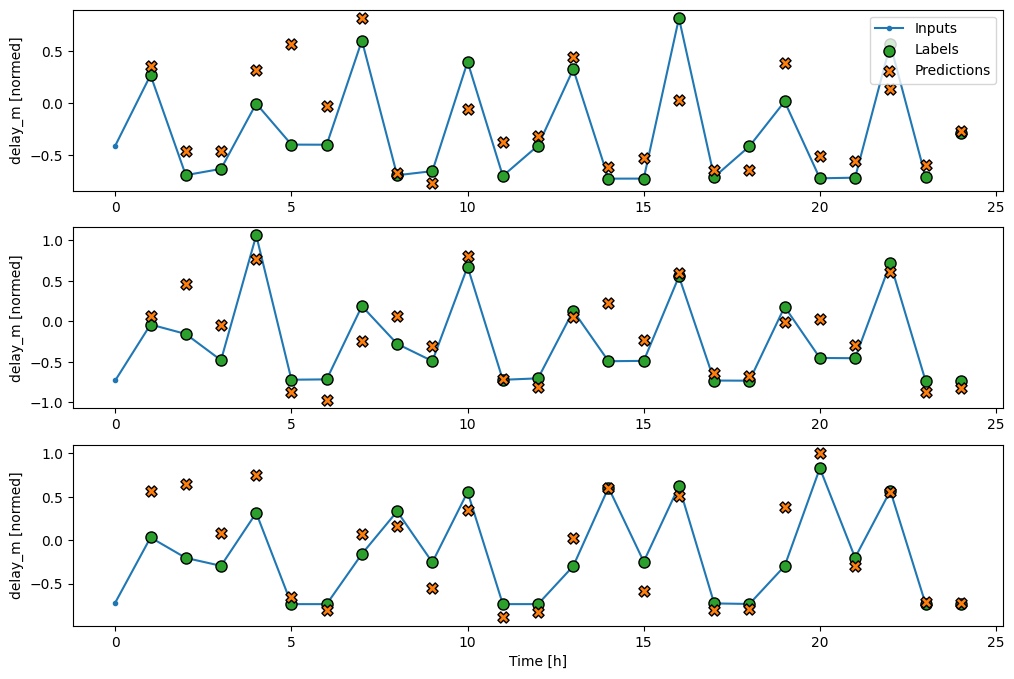

In [306]:
wide_window.plot(lstm_model)

## Performance

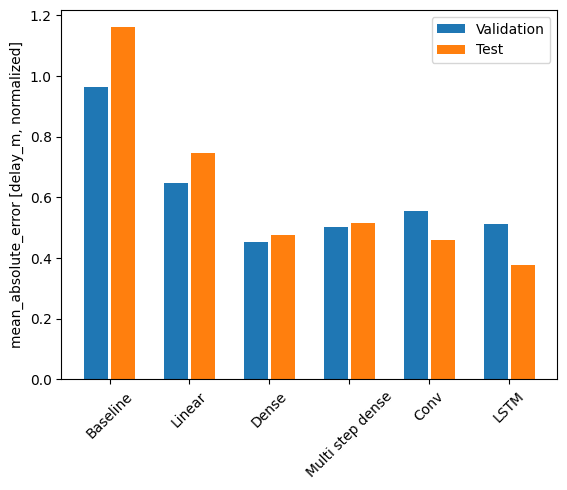

In [307]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [delay_m, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

## Multi-step models

Both the single-output and multiple-output models in the previous sections made **single time step predictions**, one hour into the future.

This section looks at how to expand these models to make **multiple time step predictions**.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

1. Single shot predictions where the entire time series is predicted at once.
2. Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict **all the features across all output time steps**.


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

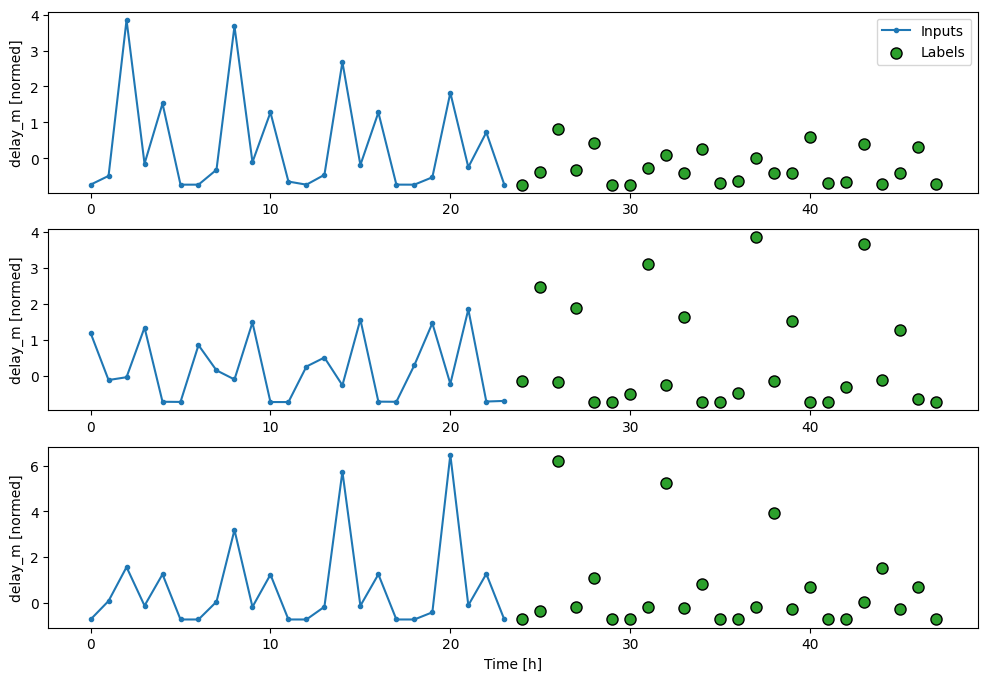

In [308]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Multistep baseline

3/3 [==============================] - 0s 3ms/step - loss: 1.6097 - mean_absolute_error: 0.8692


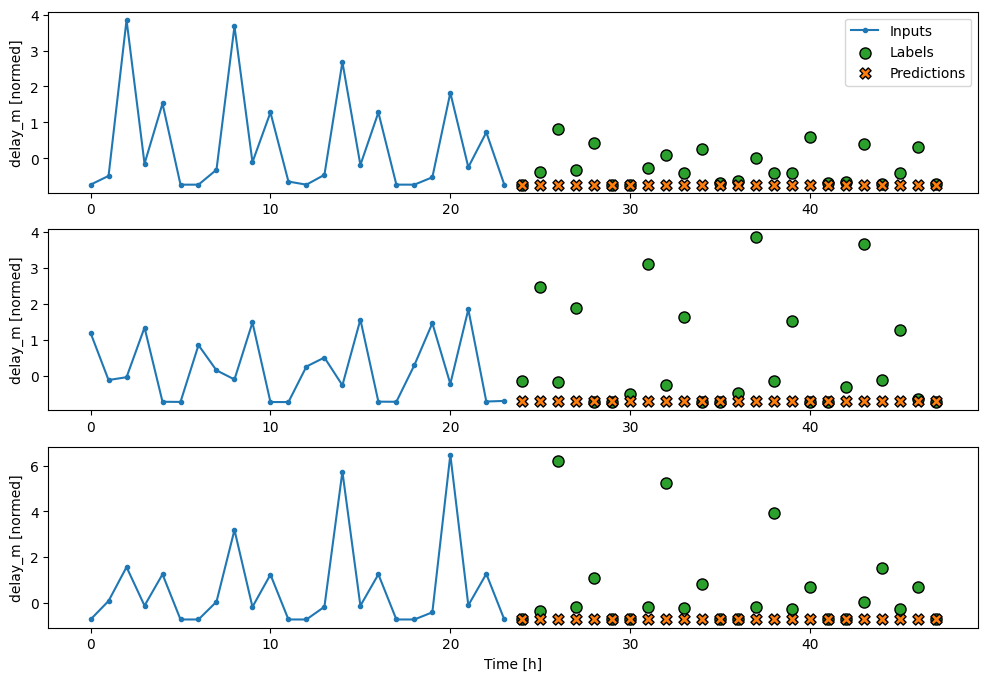

In [309]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Since this task is to predict 24 hours into the future, given 24 hours of the past, another simple approach is to repeat the previous day, assuming tomorrow will be similar:


3/3 [==============================] - 0s 4ms/step - loss: 0.1548 - mean_absolute_error: 0.1053


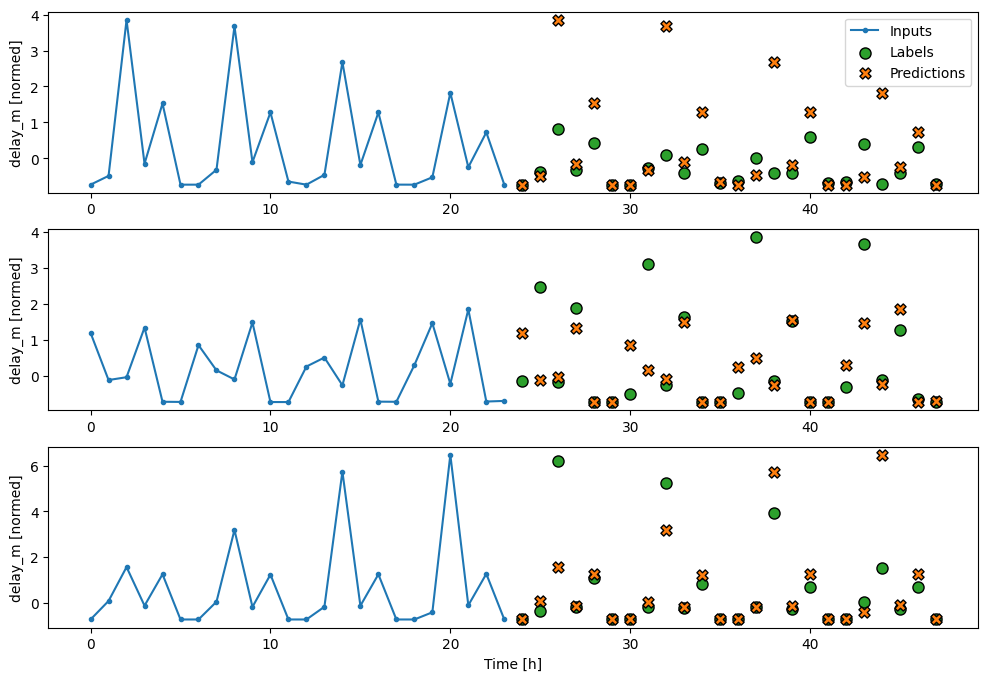

In [310]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a `tf.keras.layers.Dense` with `OUT_STEPS*features` output units. The model just needs to reshape that output to the required `(OUTPUT_STEPS, features)`.

#### Linear

A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict `OUTPUT_STEPS` time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

Epoch 1/20
14/14 [==============================] - 1s 14ms/step - loss: 0.9781 - mean_absolute_error: 0.8163 - val_loss: 1.2976 - val_mean_absolute_error: 0.9381
Epoch 2/20
14/14 [==============================] - 0s 6ms/step - loss: 0.9475 - mean_absolute_error: 0.8026 - val_loss: 1.2754 - val_mean_absolute_error: 0.9304
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.9181 - mean_absolute_error: 0.7892 - val_loss: 1.2547 - val_mean_absolute_error: 0.9230
Epoch 4/20
14/14 [==============================] - 0s 5ms/step - loss: 0.8900 - mean_absolute_error: 0.7764 - val_loss: 1.2338 - val_mean_absolute_error: 0.9156
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 0.8627 - mean_absolute_error: 0.7636 - val_loss: 1.2137 - val_mean_absolute_error: 0.9082
Epoch 6/20
14/14 [==============================] - 0s 5ms/step - loss: 0.8363 - mean_absolute_error: 0.7511 - val_loss: 1.1936 - val_mean_absolute_error: 0.9003
Epoch 7/20
14/14 [=========

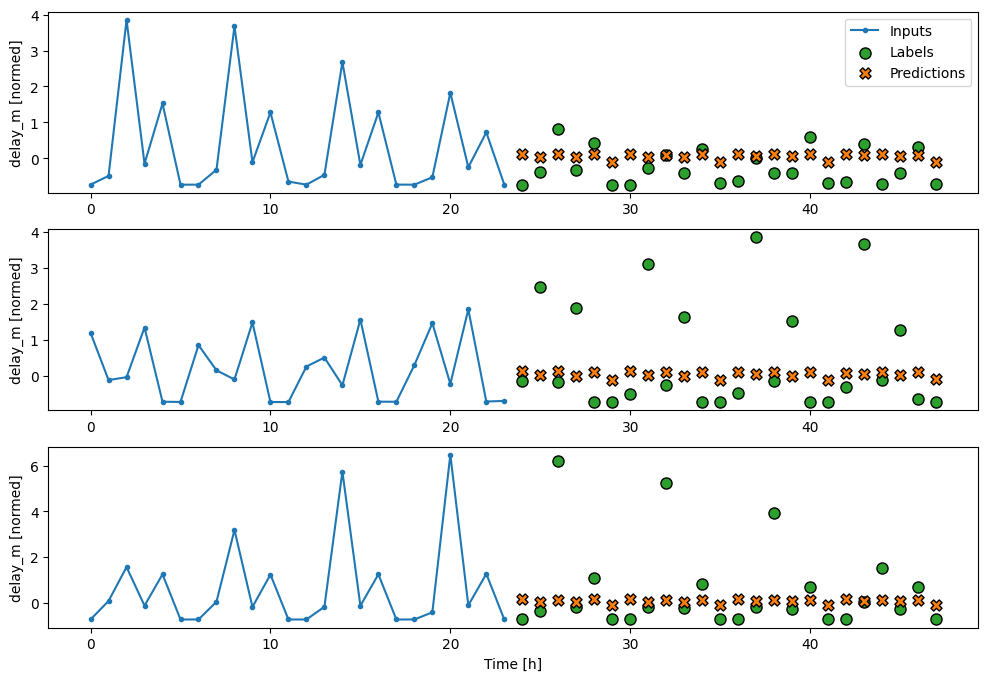

In [311]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense

Epoch 1/20
14/14 [==============================] - 1s 21ms/step - loss: 0.8610 - mean_absolute_error: 0.7625 - val_loss: 1.0357 - val_mean_absolute_error: 0.8416
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.5310 - mean_absolute_error: 0.5862 - val_loss: 0.7073 - val_mean_absolute_error: 0.6806
Epoch 3/20
14/14 [==============================] - 0s 7ms/step - loss: 0.2513 - mean_absolute_error: 0.3721 - val_loss: 0.4116 - val_mean_absolute_error: 0.4641
Epoch 4/20
14/14 [==============================] - 0s 6ms/step - loss: 0.1267 - mean_absolute_error: 0.1924 - val_loss: 0.2533 - val_mean_absolute_error: 0.2998
Epoch 5/20
14/14 [==============================] - 0s 8ms/step - loss: 0.1070 - mean_absolute_error: 0.1515 - val_loss: 0.1727 - val_mean_absolute_error: 0.2226
Epoch 6/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.1169 - val_loss: 0.1385 - val_mean_absolute_error: 0.1841
Epoch 7/20
14/14 [=========

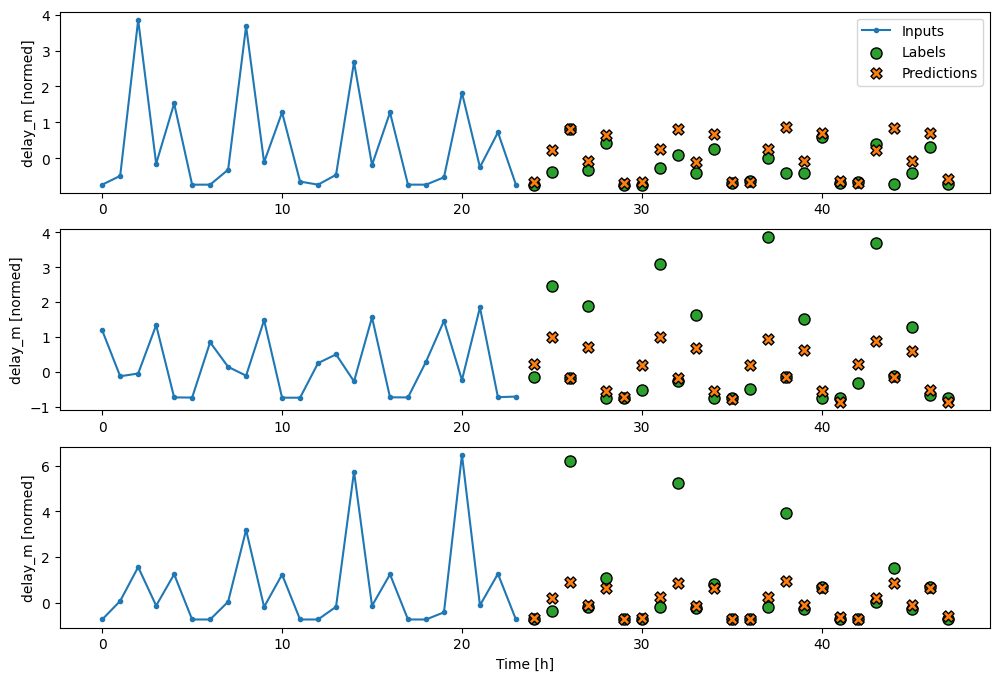

In [312]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

Epoch 1/20
14/14 [==============================] - 1s 27ms/step - loss: 0.8949 - mean_absolute_error: 0.7793 - val_loss: 1.1245 - val_mean_absolute_error: 0.8741
Epoch 2/20
14/14 [==============================] - 0s 8ms/step - loss: 0.5980 - mean_absolute_error: 0.6251 - val_loss: 0.8452 - val_mean_absolute_error: 0.7458
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.2908 - mean_absolute_error: 0.4088 - val_loss: 0.5490 - val_mean_absolute_error: 0.5470
Epoch 4/20
14/14 [==============================] - 0s 12ms/step - loss: 0.1374 - mean_absolute_error: 0.2147 - val_loss: 0.3390 - val_mean_absolute_error: 0.3654
Epoch 5/20
14/14 [==============================] - 0s 10ms/step - loss: 0.1085 - mean_absolute_error: 0.1704 - val_loss: 0.2327 - val_mean_absolute_error: 0.2883
Epoch 6/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0900 - mean_absolute_error: 0.1263 - val_loss: 0.1582 - val_mean_absolute_error: 0.2327
Epoch 7/20
14/14 [=====

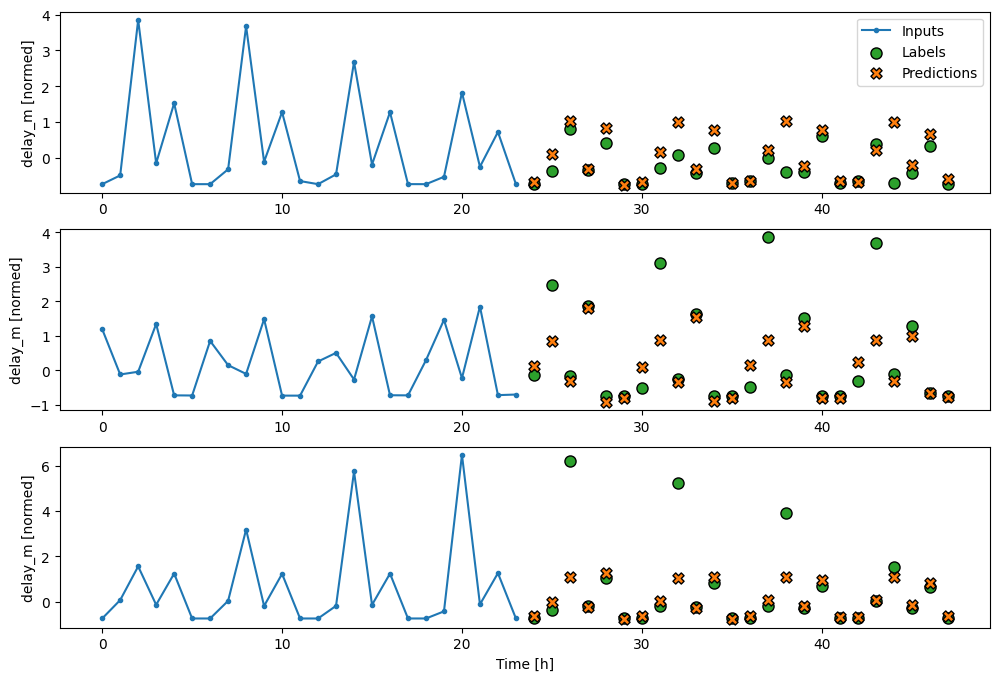

In [313]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### LSTM

Epoch 1/20
14/14 [==============================] - 4s 56ms/step - loss: 0.9738 - mean_absolute_error: 0.8140 - val_loss: 1.2824 - val_mean_absolute_error: 0.9348
Epoch 2/20
14/14 [==============================] - 0s 14ms/step - loss: 0.9243 - mean_absolute_error: 0.7902 - val_loss: 1.2418 - val_mean_absolute_error: 0.9263
Epoch 3/20
14/14 [==============================] - 0s 20ms/step - loss: 0.8614 - mean_absolute_error: 0.7558 - val_loss: 1.2024 - val_mean_absolute_error: 0.9211
Epoch 4/20
14/14 [==============================] - 0s 17ms/step - loss: 0.7995 - mean_absolute_error: 0.7200 - val_loss: 1.1677 - val_mean_absolute_error: 0.9117
Epoch 5/20
14/14 [==============================] - 0s 27ms/step - loss: 0.7368 - mean_absolute_error: 0.6842 - val_loss: 1.1260 - val_mean_absolute_error: 0.8945
Epoch 6/20
14/14 [==============================] - 0s 16ms/step - loss: 0.6738 - mean_absolute_error: 0.6451 - val_loss: 1.0788 - val_mean_absolute_error: 0.8726
Epoch 7/20
14/14 [====

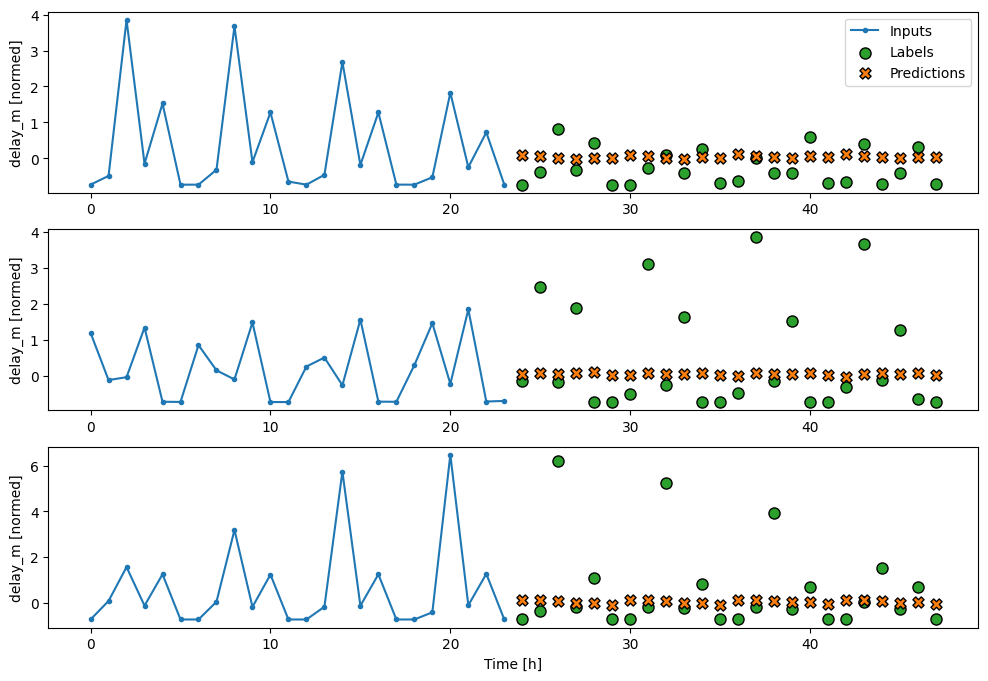

In [314]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Advanced: Autoregressive model

The above models all predict the entire output sequence in a single step.

In some cases it may be helpful for the model to decompose this prediction into individual time steps. Then, each model's output can be fed back into itself at each step and predictions can be made conditioned on the previous one, like in the classic <a href="https://arxiv.org/abs/1308.0850" class="external">Generating Sequences With Recurrent Neural Networks</a>.

One clear advantage to this style of model is that it can be set up to produce output with a varying length.

You could take any of the single-step multi-output models trained in the first half of this tutorial and run in an autoregressive feedback loop, but here you'll focus on building a model that's been explicitly trained to do that.

In [315]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

The first method this model needs is a `warmup` method to initialize its internal state based on the inputs. Once trained, this state will capture the relevant parts of the input history. This is equivalent to the single-step `LSTM` model from earlier:

In [316]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [317]:
# This method returns a single time-step prediction and the internal state of the `LSTM`:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 9])

With the `RNN`'s state, and an initial prediction you can now continue iterating the model feeding the predictions at each step back as the input.

The simplest approach for collecting the output predictions is to use a Python list and a `tf.stack` after the loop.

In [318]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [319]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 9)


Epoch 1/20
14/14 [==============================] - 9s 132ms/step - loss: 0.9615 - mean_absolute_error: 0.8102 - val_loss: 1.2250 - val_mean_absolute_error: 0.9556
Epoch 2/20
14/14 [==============================] - 0s 27ms/step - loss: 0.8806 - mean_absolute_error: 0.7568 - val_loss: 1.1557 - val_mean_absolute_error: 0.9326
Epoch 3/20
14/14 [==============================] - 0s 19ms/step - loss: 0.8231 - mean_absolute_error: 0.7236 - val_loss: 1.1036 - val_mean_absolute_error: 0.8953
Epoch 4/20
14/14 [==============================] - 0s 18ms/step - loss: 0.7738 - mean_absolute_error: 0.6825 - val_loss: 1.0603 - val_mean_absolute_error: 0.8589
Epoch 5/20
14/14 [==============================] - 0s 17ms/step - loss: 0.7011 - mean_absolute_error: 0.6373 - val_loss: 1.0330 - val_mean_absolute_error: 0.8442
Epoch 6/20
14/14 [==============================] - 0s 17ms/step - loss: 0.6048 - mean_absolute_error: 0.5715 - val_loss: 0.9647 - val_mean_absolute_error: 0.8005
Epoch 7/20
14/14 [===

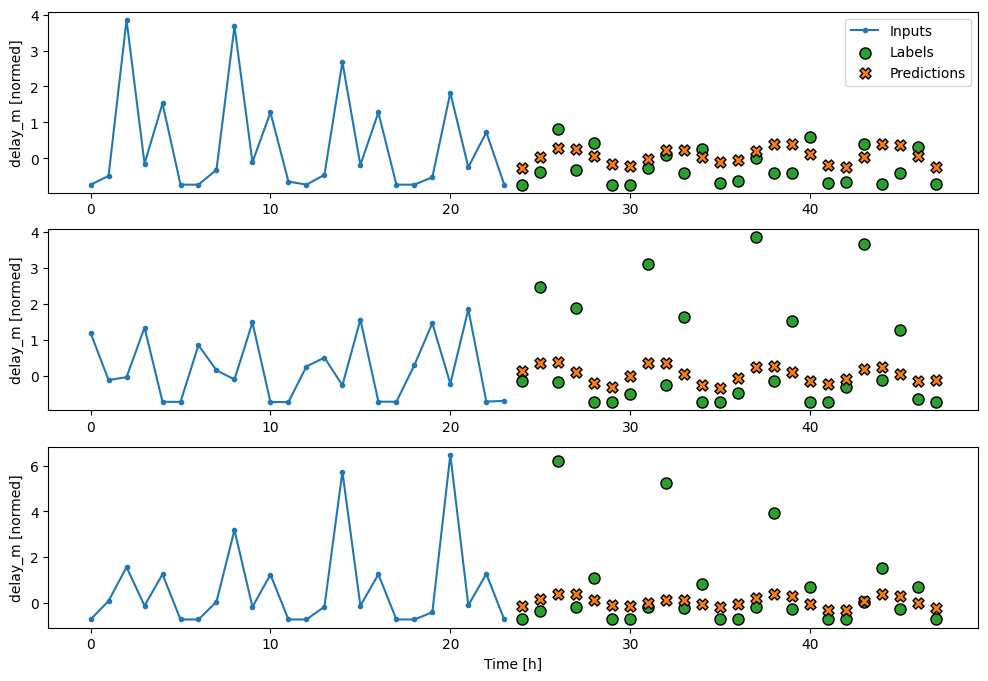

In [320]:
history = compile_and_fit(feedback_model, multi_window)

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

### Multi Performance

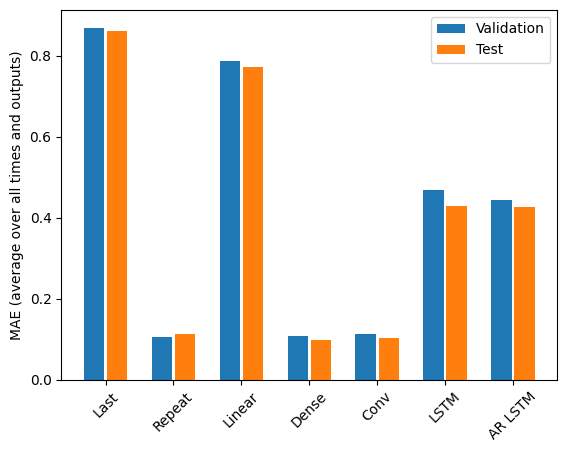

In [321]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()